## Python examples and Exploratory Data Analysis using Pandas


In [1]:
# Get month
month = int(input('Enter the month in numeric form: '))

# Get day
day = int(input('Enter the day of the month: '))

# Get year
year = int(input('Enter the year in two digit format: '))

# Check if month input is valid
if month > 12 or month < 1:
    print('Error: invalid month input')

# Check if day input is valid
elif day > 31 or day < 1:
    print('Error: invalid day input')

# Check if year input is valid
elif year > 99 or year < 0:
    print('Error: invalid year input')

# Input is valid
else:
    # Display magic date evaluation
    print(f'The date is {month}/{day}/{year}')
    if (day * month) == year:
        print ('This is a magic date.')
    else:
        print ('This is not a magic date.')


Enter the month in numeric form: 3
Enter the day of the month: 3
Enter the year in two digit format: 33
The date is 3/3/33
This is not a magic date.


#### Do you know which dates are called "magic?"

### Pandas, Numpy and Matplotlib example

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [ ]:
pwd


In [4]:
# The file below is a data file from your main book. Save it as CSV, using excel.

# Run the code and explore its functionality. Practive with other pandas methods

df = pd.read_csv("CreditRiskData.csv")


In [5]:
df.head()


Loan Purpose  Checking   Savings  Months Customer  Months Employed  \
0  Small Appliance          0      739               13               12   
1        Furniture          0     1230               25                0   
2          New Car          0      389               19              119   
3        Furniture        638      347               13               14   
4        Education        963     4754               40               45   

  Gender Marital Status  Age Housing  Years         Job Credit Risk  
0      M         Single   23     Own      3   Unskilled         Low  
1      M       Divorced   32     Own      1     Skilled        High  
2      M         Single   38     Own      4  Management        High  
3      M         Single   36     Own      2   Unskilled        High  
4      M         Single   31    Rent      3     Skilled         Low

In [6]:
df.columns


Index(['Loan Purpose', 'Checking ', 'Savings', 'Months Customer',
       'Months Employed', 'Gender', 'Marital Status', 'Age', 'Housing',
       'Years', 'Job', 'Credit Risk'],
      dtype='object')

In [7]:
df.shape


(425, 12)

In [8]:
df.dtypes


Loan Purpose       object
Checking            int64
Savings             int64
Months Customer     int64
Months Employed     int64
Gender             object
Marital Status     object
Age                 int64
Housing            object
Years               int64
Job                object
Credit Risk        object
dtype: object

In [9]:
df.rename(columns={'Checking ':'Checking'},inplace=True)


In [10]:
df['Loan Purpose'].unique()


array(['Small Appliance', 'Furniture', 'New Car', 'Education', 'Business',
       'Used Car', 'Repairs', 'Other', 'Retraining', 'Large Appliance'],
      dtype=object)

In [13]:
df_subset1= df[['Checking','Savings','Credit Risk']]
df_subset1


Checking  Savings Credit Risk
0           0      739         Low
1           0     1230        High
2           0      389        High
3         638      347        High
4         963     4754         Low
..        ...      ...         ...
420       497        0         Low
421         0        0        High
422         0        0        High
423         0      712        High
424         0      912         Low

[425 rows x 3 columns]

In [14]:
df_subset2=df[(df.Gender == 'M')&(df.Age>65)]
df_subset2


Loan Purpose  Checking  Savings  Months Customer  Months Employed Gender  \
155      New Car      3329        0               19               15      M   
182     Business         0      406                6               35      M   
362      New Car         0      272                7               90      M   

    Marital Status  Age Housing  Years         Job Credit Risk  
155         Single   67    Rent      4     Skilled        High  
182         Single   73     Own      4   Unskilled         Low  
362         Single   67     Own      4  Management        High

In [21]:
df['Gender_code'] = df['Gender'].map({'M':1,'F':0}) 
df['Gender_code']


0      1
1      1
2      1
3      1
4      1
      ..
420    1
421    1
422    0
423    0
424    1
Name: Gender_code, Length: 425, dtype: int64

In [22]:
df['Gender_code'] = df['Gender'].map({'M':0,'F':1}) 
df['Gender_code']


0      0
1      0
2      0
3      0
4      0
      ..
420    0
421    0
422    1
423    1
424    0
Name: Gender_code, Length: 425, dtype: int64

In [17]:
pt = pd.pivot_table(data=df,index=['Job'])
pt


Age     Checking  Gender_code  Months Customer  \
Job                                                                
Management  38.555556   606.944444     0.796296        27.814815   
Skilled     32.966790  1079.236162     0.671587        23.841328   
Unemployed  36.090909  1697.636364     0.363636        19.818182   
Unskilled   36.022472  1140.269663     0.685393        17.415730   

            Months Employed      Savings     Years  
Job                                                 
Management        44.388889  1616.833333  2.888889  
Skilled           32.140221  1836.428044  2.819188  
Unemployed         1.000000  2760.909091  2.636364  
Unskilled         27.393258  1741.438202  2.898876

In [18]:
pt = pd.pivot_table(df, "Age", ["Job", "Years"] )
pt


Age
Job        Years           
Management 1      43.000000
           2      32.789474
           3      37.400000
           4      43.476190
Skilled    1      30.628571
           2      30.372093
           3      33.930233
           4      35.429907
Unemployed 1      24.666667
           2      28.333333
           4      47.600000
Unskilled  1      33.363636
           2      33.000000
           3      36.315789
           4      38.611111

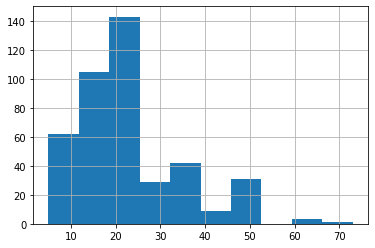

In [19]:
df['Months Customer'].hist()


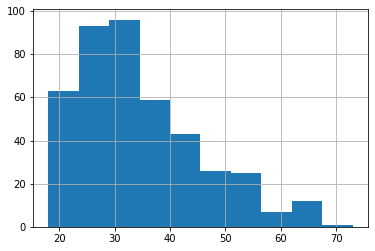

In [20]:
df['Age'].hist()


In [ ]:
# both are right skewed